# Parkinsons

In [1]:
import pandas as pd
import ehrapy as ep
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Installed version 0.4.0 of ehrapy is newer than the latest release 0.3.0! You are running a nightly version and 
features may break!

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.names

File 'parkinsons.data' already there; not retrieving.

File 'parkinsons.names' already there; not retrieving.



# Data Wrangling

In [4]:
data = pd.read_csv("parkinsons.data", sep=",")

Since the dataset does not have a measurement ID we add one.

In [5]:
data["measurement_id"] = range(1, len(data) + 1)

In [6]:
data.set_index("measurement_id", inplace=True)

In [7]:
data.to_csv("parkinsons_prepared.csv")

## ehrapy sanity check

In [8]:
adata = ep.io.read_csv("parkinsons_prepared.csv",
                   columns_obs_only=["name"],
                   index_column="measurement_id")

2023-01-18 19:25:31,957 - root INFO - Transformed passed dataframe into an AnnData object with n_obs x n_vars = `195` x `23`.


In [9]:
adata=ep.pp.encode(adata,autodetect=True)

Detected no columns that need to be encoded. Leaving passed AnnData object unchanged.

2023-01-18 19:25:32,044 - root INFO - Column names for numeric variables ['MDVP:Fo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'MDVP:Shimmer', 'MDVP:PPQ', 'D2', 'spread1', 'MDVP:RAP', 'MDVP:APQ', 'Jitter:DDP', 'DFA', 'Shimmer:APQ5', 'HNR', 'MDVP:Flo(Hz)', 'NHR', 'spread2', 'Shimmer:DDA', 'status', 'RPDE', 'PPE', 'MDVP:Fhi(Hz)', 'MDVP:Jitter(%)'] were replaced.


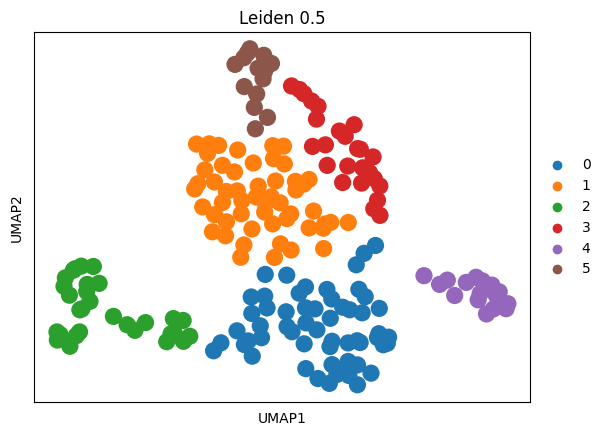

In [10]:
ep.pp.scale_norm(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")